<h2><center>Introduction to Machine Learning, Summer 2022</center></h2>
  <h3><center>  Assignment 2</center></h3>

__Given date:__ June 13

__Due date:__ June 21

__Total: 25pts__



### Question 1 Logistic regression (15pts)

##### Question 1.1 Logistic regression (5pts)

As we saw during the lectures, one approach at learning a (binary) linear discriminant is to combine the sigmoid activation function with the linear discriminant $\beta_0 + \mathbf{\beta}^T \mathbf{x}$. We then assume that the probability of having a particular target ($0$ vs $1$) follows a Bernoulli with parameter $\sigma(\tilde{\mathbf{\beta}}^T\tilde{\mathbf{x}})$. i.e. we have 

$$\left\{\begin{array}{l}
P(t = 1|x) = \sigma(\mathbf{\beta}^T\mathbf{x})\\
P(t = 0|x) = 1-\sigma(\mathbf{\beta}^T\mathbf{x})\end{array}\right.$$

The total density can read from the product of each of the independent densities as 

$$P(\left\{t_i\right\}_{i=1}^N) = \prod_{i=1}^N \sigma(\mathbf{\beta}^T\mathbf{x})^{t^{(i)}}(1-\sigma(\mathbf{\beta}^T\mathbf{x}))^{1-t^{(i)}}$$

we can then take the log and compute the derivatives of the resulting expression with respect to each weight $\beta_j$. Implement this approach below. Recall that the derivative of the sigmoid $\sigma(\boldsymbol x)$ has a _simple expression_. 

In [1]:
# Step 1 define the sigmoid activation and its derivative
import numpy as np

def sigmoid(x):

    '''the function should return the sigmoid and its derivative at all the 
    entries of x '''
    sig = 1/(1+np.exp(-x)) # sigmoid function
    deriv_sig = sig*(1-sig)# sigmoid deriative
    
    return sig, deriv_sig


def solve_logisticRegression(xi, ti, beta0, maxIter, eta):
    
    '''The function should return the vector of weights for a 
    logistic regression classifier learned through gradient descent 
    iterations applied to the log likelihood function'''
    iter = 0 #initial iteration = 0
    beta = beta0 ##initialize
    intercept = np.ones((xi.shape[0], 1)) # initialize intercept to 1
    xi = np.concatenate((intercept, xi), axis=1)

    while iter <= maxIter:
      z = np.dot(xi, beta) # linear function
      h,_= sigmoid(z)  
      gradient = np.dot(xi.T, (h - ti)) / ti.shape[0]#
      beta -= eta * gradient # calculate the length of steps and take the gradient descent
      # sig,_ = sigmoid(np.dot(beta, xi.T)
      # beta = beta + eta * (ti - sig)) * xi.T
      iter +=1
    
    return beta






#### Question 1.2 Logistic regression and Fisher scoring (5pts)

An interesting aspect of the MLE estimator in logistic regression (as opposed to other objective functions) is that the Hessian is positive definite. We can thus improve the iterations by using a second order method (such as Newton's method) where the simpler gradient iterations $ \mathbf{\boldsymbol \beta}^{k+1}\leftarrow \mathbf{\boldsymbol \beta}^k - \eta\nabla \ell(\mathbf{\boldsymbol \beta}^k)$ are replaced by 

$$\mathbf{\boldsymbol \beta}^{k+1}\leftarrow \mathbf{\boldsymbol \beta}^k - \eta H^{-1}({{\boldsymbol \beta}^k})\nabla \ell(\mathbf{\boldsymbol \beta}^k)$$

(see e.g. [here](https://statacumen.com/teach/SC1/SC1_11_LogisticRegression.pdf) for more details) Start by completing the function 'HessianMLE' below which should return the Hessian of the negative log likelihood. 

In [2]:

def HessianMLE(beta,data):
    
    '''Function should return the Hessian (see https://en.wikipedia.org/wiki/Hessian_matrix) 
    of the log likelihood at a particular value of the weights beta'''
    intercept = np.ones((data.shape[0], 1)) # initialize intercept to 1
    xi = np.concatenate((intercept, data), axis=1)
    (n, m) = xi.shape
    A = np.eye(n)
    for j in range(n):
      h,_= sigmoid(xi[j].dot(beta))
      A[j, j] = h * (1 - h) + 0.0001
    HessianMatrix = xi.T.dot(A).dot(xi)

    
    return HessianMatrix
   

Then complete the function 'Fisher_scoring' which should learn a logistic regression classifier based on the second order Fisher iterations. 

In [3]:
from numpy import linalg
def Fisher_scoring(beta0, maxIter, eta,data,y):
    
    '''Function should compute the logistic regression classifier by relying on Fisher scoring
    iterates should start at beta0 and be applied with a learning eta'''
    betaPrevious = beta0
    numIter = 0
    intercept = np.ones((data.shape[0], 1)) # initialize intercept to 1
    xi = np.concatenate((intercept, data), axis=1)

    while numIter<maxIter:
        temp,_ = sigmoid(xi.dot(betaPrevious))
        gradient = xi.T.dot(temp - y)
    
        hessian_beta = HessianMLE(betaPrevious,data)
        if np.any(np.linalg.eig(hessian_beta) != 0):
            invHessian = np.linalg.inv(hessian_beta) 
        else:
            print('Error')
        
        betaNext = betaPrevious - eta*np.matmul(invHessian,gradient)
        betaPrevious = betaNext
        numIter +=1

    optimal_beta = betaNext

    return optimal_beta

#### Question 1.3 Comparing the two approaches. (5pts)

Compare the simple (first order) gradient iterations with the (second order) Fisher iterations for the dataset given below. Plot the evolution of the log likelihood through the iterations, for both methods.  

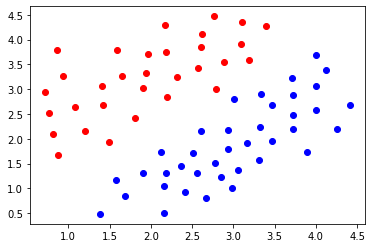

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io
class1 = scipy.io.loadmat('class1HW1_LR.mat')['class1']
class2 = scipy.io.loadmat('class2HW1_LR.mat')['class2']

targets_class1 = np.ones(np.shape(class1)[0])
targets_class2 = np.zeros(np.shape(class2)[0])

plt.scatter(class1[:,0], class1[:,1], c = 'r')
plt.scatter(class2[:,0], class2[:,1], c = 'b')
plt.show()

In [5]:
#construct data set
data = np.concatenate((class1,class2),axis=0)
y = np.concatenate((targets_class1,targets_class2),axis=0)

In [6]:
beta0 = np.zeros(data.shape[1]+1)
beta_log = solve_logisticRegression(data, y, beta0, 100, 0.1)  # get weight

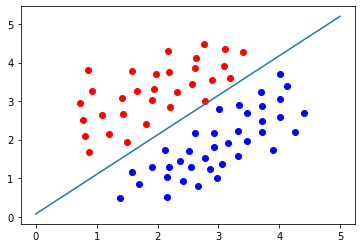

In [7]:
x1_plot = np.linspace(0, 5,100)
x2_plot = ( -beta_log[1] * x1_plot - beta_log[0]) / beta_log[2] # construct boundary of classification
plt.scatter(class1[:,0], class1[:,1], c = 'r') # plot the original data
plt.scatter(class2[:,0], class2[:,1], c = 'b') # plot the original data
plt.plot(x1_plot, x2_plot) # plot the boundary
plt.show() 

The second method

In [8]:
beta_log_2 = Fisher_scoring(beta0, 100, 0.1,data,y)

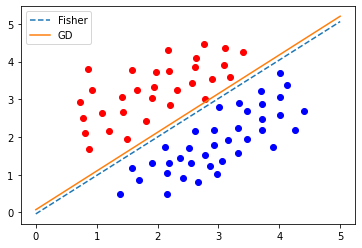

In [9]:

x3_plot = ( -beta_log_2[1] * x1_plot - beta_log_2[0]) / beta_log_2[2] # construct boundary of classification
plt.scatter(class1[:,0], class1[:,1], c = 'r') # plot the original data
plt.scatter(class2[:,0], class2[:,1], c = 'b') # plot the original data
plt.plot(x1_plot, x3_plot,linestyle="--",label = "Fisher") # plot the boundary
plt.plot(x1_plot, x2_plot,label='GD') 
plt.legend()
plt.show() 

### Question 2. Convolutional nets and autonomous driving  (10pts)

In this second question, we will use [the Keras API](https://keras.io/) to build and train a convolutional neural network to discriminate between four types of road signs. To simplify we will consider 4 different signs: 

- A '30 km/h' sign (folder 1)
- A 'Stop' sign 
- A 'Go straight' sign
- A 'Keep left' sign 


<img src="learning2Drive.jpeg" style="width:400px">


An example of each sign is given below.

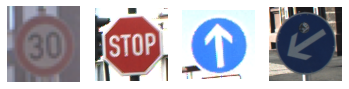

In [10]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('1/00001_00000_00012.png')
plt.subplot(141)
plt.imshow(img1)
plt.axis('off')
plt.subplot(142)
img2 = mpimg.imread('2/00014_00001_00019.png')
plt.imshow(img2)
plt.axis('off')
plt.subplot(143)
img3 = mpimg.imread('3/00035_00008_00023.png')
plt.imshow(img3)
plt.axis('off')
plt.subplot(144)
img4 = mpimg.imread('4/00039_00000_00029.png')
plt.imshow(img4)
plt.axis('off')
plt.show()

### Question 2.1. (Constructing the network 5pts) 

In this first part, we will set up the convolutional net step by step.

- Before building the network, you should start by cropping the images so that they all have a common predefined size (take the smallest size across all images) 


- We will use a __Sequential model__ from Keras but it will be up to you to define the final structure of the network. The construction of a sequential model should be started with the following line 

In [11]:
#read data
def read_picture(path,n_H,n_W,n_C):
    import os
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt
    #function: get the picture of path, and turn it into the array with the shape of [m,n_H,n_W,n_C]
    #path:str, path of the picture
    #n_C:int,dimension of the picture，white and black with the input of 1，rgb with the input of 3
    #datas：return the array (matrix) with the dimension of（m，n_H,n_W,n_C）
    datas=[]
    x_dirs=os.listdir(path)
    for x_file in x_dirs:
        fpath=os.path.join(path,x_file)
        if n_C == 1 :
            _x=Image.open(fpath).convert("L")
        elif n_C ==3:
            _x=Image.open(fpath)
            _x=_x.resize((n_W,n_H))
        else:
            print("Error：wrong picture dimensions")
        
        # if need to zoom in/out the picture
        '''
        rat=0.8          #rate
        n_W=int(rat*n_W)
        n_H=int(rat*n_H)
          #give data to n_W,n_H to change the size of pictures
        '''
        datas.append(np.array(_x))
        #datas.append(np.transpose(np.array(_x), (2,0,1)))
        _x.close()  
    datas=np.array(datas)
    
    m=datas.shape[0]
    datas=datas.reshape((m,n_H,n_W,n_C))
    #print(datas.shape)
    
    return datas


In [12]:
# read four files, and combine the data, and create the data set
path_list = ["./1","./2","./3","./4"]
i = 0 
for path in path_list:
  if i == 0:
    datas = read_picture(path,28,28,3)
    labels = np.full((datas.shape[0],1), int(path[-1]))
    i +=1
  else:
    data = read_picture(path,28,28,3)
    label = np.full((data.shape[0],1), int(path[-1]))
    datas = np.concatenate((datas,data),axis = 0)
    labels = np.concatenate((labels,label),axis = 0)
  

In [13]:
print("data shape {}, label shape {}".format(datas.shape,labels.shape))

data shape (4500, 28, 28, 3), label shape (4500, 1)


In [14]:
# set the label as onehot
from sklearn.preprocessing import OneHotEncoder

OneHote = OneHotEncoder()
OneHote.fit([[1],[2],[3],[4]])
labels_ = OneHote.transform(labels).toarray()
labels_

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

#### 2.1.a. Convolutions. 

- We will use a __convolutional__ architecture. you can add convolutional layers to the model by using the following lines 

In [ ]:
#from tensorflow.keras.models import Model
model.add(Conv2D(num_units, (filter_size1, filter_size2), padding='same',
                             input_shape=(3, IMG_SIZE, IMG_SIZE),
                             activation='relu'))
                                        

for the first layer and                     

In [ ]:
model.add(Conv2D(filters, filter_size, activation, input_shape)

for all the other layers. The 'filters' parameter indicates the number of filters you want to use in the layer. 'filter_size' encodes the size of each filter and 'activation' can be used to specify the activation function that will be applied to the output of the layer, i.e.

$$x_{\text{out}} = \sigma(\text{filter}*\text{input}).$$ 

Finally 'input_shape' encodes the size of the input. Note that the input layer is the only layer for which the input size should be explicitely specified. Subsequent layers will automatically compute the size of their inputs based on the outputs of the previous layers. 

#### 2.1.b Pooling Layers 

On top of the convolutional layers, convolutional neural networks (CNN) also involve __Pooling layers__. The addition of such layer can be done through the following line 

In [ ]:
 model.add(MaxPooling2D(pool_size=(filter_sz1, filter_sz2),strides=None))

The __pooling layers__ come with two parameters: the 'pool size' and the 'stride'. The basic choice for the pool size is (2,2) and the stride is usually set to None (which means it will split the image into non overlapping regions such as in the Figure below). You should however feel free to play a little with those parameters. A __Max Pooling operator__ slides a mask of size 'pool_size' over the image by a number of pixels equal to the stride parameters (in x and y, there are hence two translation parameters). for each position of the mask, the output then returns the max of the pixels appearing in the mask (again, see the Figure below). One way to understand the effect of a pooling operator is that when the filter detects an edge in a subregion of the image (thus returning at least one large value), although the MaxPooling operation will reduce the resolution, it will keep track of this information.    

Adding 'Maxpooling' layers is known to work well in practice for image processing tasks. 

<img src="Maxpool.png" style="width:500px">


Although it is up to you to decide how you want to structure the network, a good start is to add a couple (definitely not exceeding 4) combinations (convolution, convolution, Pooling) with an increasing number of units per layer (you can for example consider a number of units increasing according to powers of 2 such as 16, 32, 128,...). 

#### 2.1.c. Flattening and Fully connected layers

Once you have stacked the convolutional and pooling layers, you should flatten the output through a line of the form

In [ ]:
model.add(Flatten())

And add a couple (no need to put more than 2,3) dense fully connected layers through lines of the form

In [ ]:
model.add(Dense(num_units, activation='relu'))

#### 2.1.d. Concluding 

Since there are four possible signs, you need to __finish your network with a dense layer consisting of 4 units__. Each of those units should output a number between 0 and 1 representing the likelihood that any of the four signs is detected. Correspondingly those numbers should satisfy $n_1 + n_2 + n_3 + n_4 = 1$ (hopefully with one $n_i$ larger than the others). For this reason, a good choice for the __final activation function__ of those four units is the __softmax__ (Why?). 


Build your model below. 

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
model = Sequential()


# construct the model using convolutional layers, dense fully connected layers and 

model.add(layers.Conv2D(32, (5, 5),padding='same',input_shape=(28, 28,3),activation='relu'))  # create the convolutional layer
model.add(layers.MaxPool2D(pool_size=(2,2),strides=None))


model.add(layers.Conv2D(64,(5,5),padding="same",activation='relu'))  # create the convolutional layer
model.add(layers.MaxPool2D(pool_size=(2,2)))   # construct the pooling layer

model.add(layers.Conv2D(128,(5,5),padding="same",activation='relu'))  # create the convolutional layer
model.add(layers.MaxPool2D(pool_size=(2,2),padding="same"))   # construct the pooling layer

# create the classifier
model.add(layers.Flatten())
model.add(layers.Dense(625, activation='relu')) # full connected layer
model.add(layers.Dense(4, activation='softmax')) # output

# output the information of model's structure
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Question 2.2. Setting up the optimizer (3pts).

Once you have found a good architecture for your network, split the dataset, by retaining about 90% of the images for training and 10% for test. To train the network in Keras, we need two more steps. The first step will set up the optimizer. Here again it is up to you to decide how you want to set up the optimization. Two popular approaches are __SGD and ADAM__. You will get to choose the learning rate (although it is a good idea to take it between 1e-3 and 1e-2). Once you have set up the optimizer, you need to specify the loss (we will take it to be the __categorical cross entropy__ which is the extension of the log loss to the multiclass problem).   

In [16]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# set up the optimize here
# Myoptimizer = SGD
Myoptimizer = Adam(learning_rate=0.001) # set the learning rate

model.compile(loss='categorical_crossentropy',
              optimizer=Myoptimizer,
              metrics=['accuracy'])

### Question 2.3 Optimization (2pts).

Our last step will consist in fitting the network to the training set. Just as for any implementation in scikit-learn, we will rely on the function 'fit'. In image processing tasks, the training of convolutional neural networks is usually done by splitting the dataset into minibatches and using a different batch for each SGD iteration. This process is repeated over the whole dataset. A complete screening of the dataset is known as an 'epoch'. The complete training step then repeats several epochs. In keras the number of epochs is stored in the 'epochs' parameter of the function 'fit' and the batch size is stored in the 'batch_size' parameter. Plot the evolution of the loss through the SGD iterations. 

In [17]:
from sklearn.model_selection import train_test_split
batch_size = 32
epochs = 10
X_train, X_test, t_train, t_test = train_test_split(datas, labels_, test_size=0.1, random_state=1)
history = model.fit(X_train, t_train, batch_size=batch_size, epochs=epochs, validation_split=0.15)
model.evaluate(X_test, t_test)

Epoch 1/10
108/108 [==============================] - 18s 158ms/step - loss: 2.6804 - accuracy: 0.8861 - val_loss: 0.0721 - val_accuracy: 0.9753
Epoch 2/10
108/108 [==============================] - 18s 167ms/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0098 - val_accuracy: 0.9951
Epoch 3/10
108/108 [==============================] - 17s 158ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/10
108/108 [==============================] - 17s 156ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0052 - val_accuracy: 0.9984
Epoch 5/10
108/108 [==============================] - 18s 166ms/step - loss: 0.0450 - accuracy: 0.9881 - val_loss: 0.0290 - val_accuracy: 0.9934
Epoch 6/10
108/108 [==============================] - 18s 166ms/step - loss: 0.0737 - accuracy: 0.9869 - val_loss: 0.0161 - val_accuracy: 0.9951
Epoch 7/10
108/108 [==============================] - 17s 161ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 6.1978e-04 - va

[0.00011608901695581153, 1.0]

<Figure size 432x288 with 0 Axes>

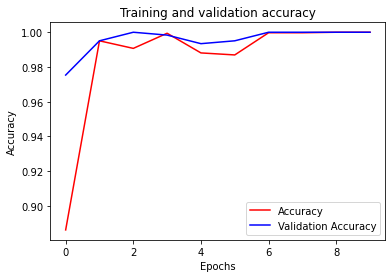

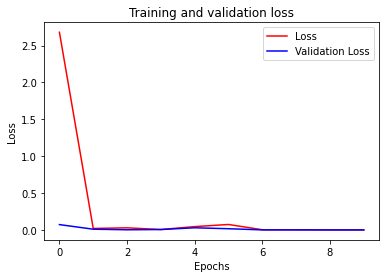

<Figure size 432x288 with 0 Axes>

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# plot accuracy curve
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

# plot loss curve
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
